## Analizamos el dataset de Housing california provisto por sklearn 

In [1]:
#Importamos librerias
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import metrics

In [3]:
import pandas as pd

def load_housing_data():
    csv_path = os.path.join("housing.csv")
    return pd.read_csv(csv_path)

### Antes que nada, veamos qué tipo de datos tenemos

In [4]:
#Cargemos los datos y veamos las primeras filas
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### Tenemos 20640 registros de 10 columnas cada uno, 9 tipo float y 1 de variables categóricas (proximidad oceano)

### Más exploracion de los datos

In [7]:
housing.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


#### Se ve que faltan datos en 'total_bedrooms'. 'Ocean_proximity' no aparece porque no es una variable numérica
Vamos a arreglar la columna de total_bedrooms imputando los valores que faltan

In [8]:
housing.iloc[:,4:5]

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [9]:
imputer = SimpleImputer(np.nan,strategy ="median")
imputer.fit(housing.iloc[:,4:5])
housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

C:\Users\Tomás\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass missing_values=nan as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Aprovechando que disponemos de longitud y latitud ploteamos en funcion de esos datos. Agregamos el ingreso medio. Podemos obtener un gráfico muy interesante.

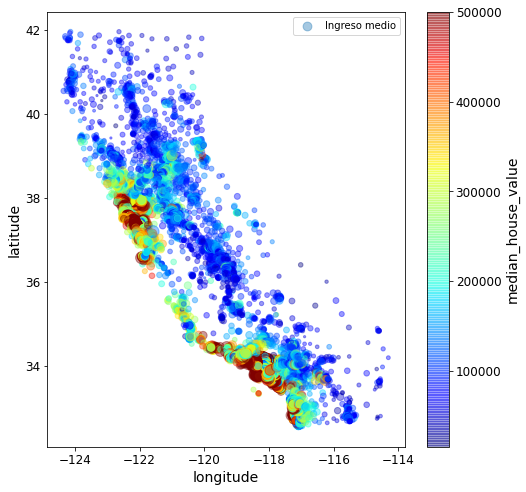

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["median_income"]*10, label="Ingreso medio", 
             c="median_house_value", figsize=(8, 8), alpha=0.4, cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

#### Se puede ver la forma de california. A continuacón probamos plotear sobre el mapa de california. Esta vez, tenemos en cuenta la poblacion y el valor medio

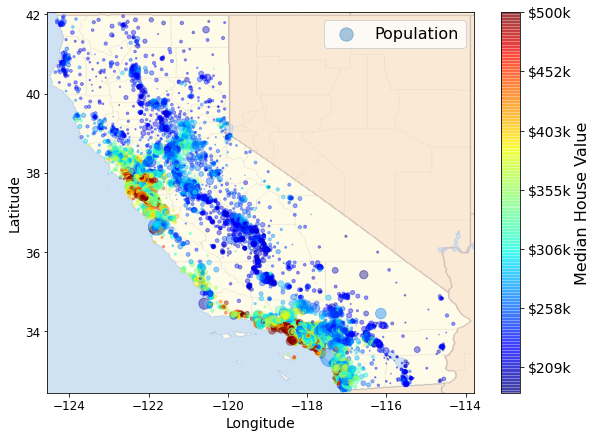

In [11]:
import matplotlib.image as mpimg
california_img=mpimg.imread( "california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

#### Seguimos mirando los datos

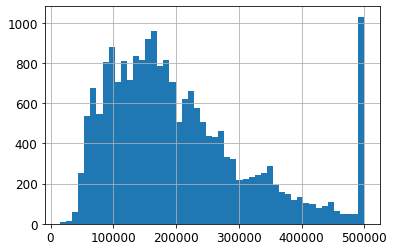

In [12]:
housing['median_house_value'].hist(bins=50)

In [13]:
sum(housing['median_house_value'] == housing.median_house_value.max())

965

#### Hay 965 distritos que fueron asignados al valor más alto (500 000). Es decir, que en el proceso de obtención de datos, se cortó en ese valor el precio de las casas.

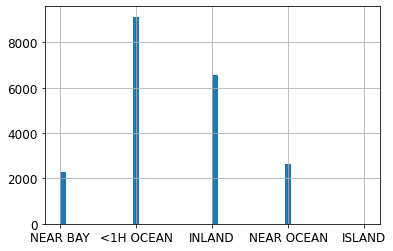

In [14]:
housing['ocean_proximity'].hist(bins=50)

### Ahora veamos la correlacion de los datos (coeficiente de Pearson)

In [15]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

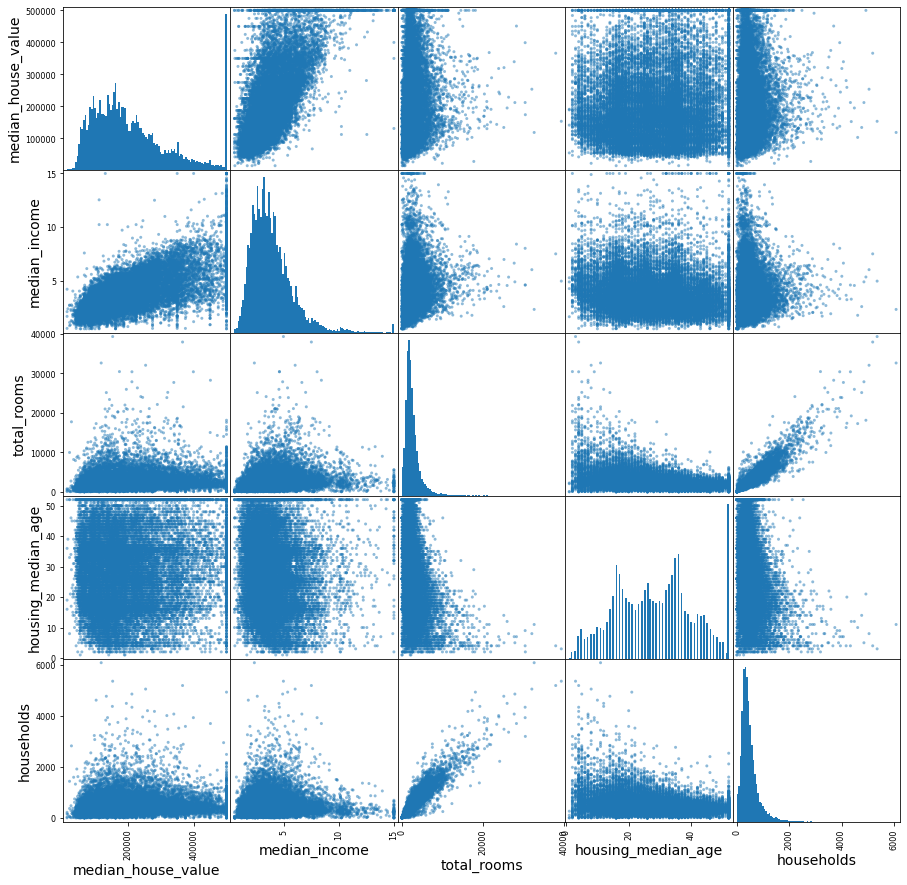

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age", "households"]
sm = scatter_matrix(housing[attributes], figsize=(15, 15), hist_kwds={'bins':100})

#### Vemos que algunos datos se saturan en cierto punto



Text(0, 0.5, 'Mediana del precio de la casa')

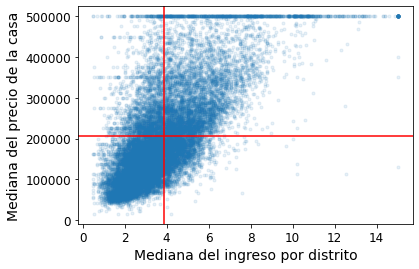

In [17]:
median_income = housing['median_income']
median_house_value = housing['median_house_value']

plt.plot(median_income, median_house_value, '.', alpha=0.1)
plt.axhline(median_house_value.mean(), color='r')
plt.axvline(median_income.mean(), color='r')
plt.xlabel('Mediana del ingreso por distrito')
plt.ylabel('Mediana del precio de la casa')

#### Limpiamos esos datos que saturan y calculamos nuevamente el coeficiente de Pearson

El coeficiente de Pearson, con datos corregidos, es: 0.64261078


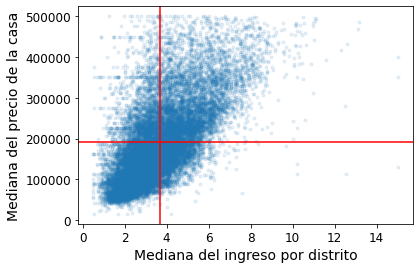

In [18]:
y = housing['median_house_value']
i = y < np.max(median_house_value)  

median_income = median_income[i]
median_house_value = median_house_value[i]



plt.plot(median_income, median_house_value, '.', alpha=0.1)
plt.axhline(median_house_value.mean(), color='r')
plt.axvline(median_income.mean(), color='r')
plt.xlabel('Mediana del ingreso por distrito')
plt.ylabel('Mediana del precio de la casa')


p_median_income = np.corrcoef(median_income, median_house_value)[0, 1]
print('El coeficiente de Pearson, con datos corregidos, es: {:.8f}'.format(p_median_income))

Text(0, 0.5, 'Mediana del precio de la casa')

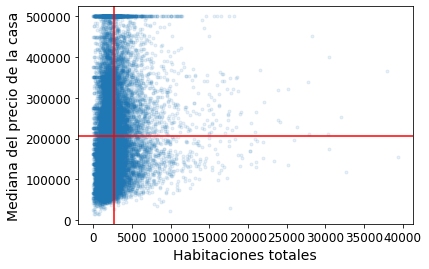

In [19]:
total_rooms = housing['total_rooms']
y = housing['median_house_value']


plt.plot(total_rooms, y, '.', alpha=0.1)
plt.axhline(y.mean(), color='r')
plt.axvline(total_rooms.mean(), color='r')
plt.xlabel('Habitaciones totales')
plt.ylabel('Mediana del precio de la casa')

El coeficiente de Pearson, con datos corregidos, es: 0.14313872


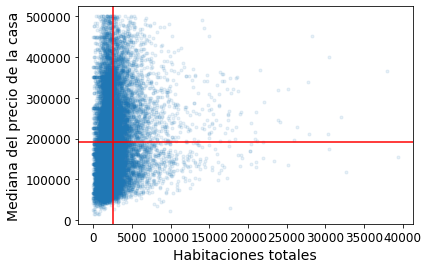

In [20]:
total_rooms = total_rooms[i]



plt.plot(total_rooms, median_house_value, '.', alpha=0.1)
plt.axhline(median_house_value.mean(), color='r')
plt.axvline(total_rooms.mean(), color='r')
plt.xlabel('Habitaciones totales')
plt.ylabel('Mediana del precio de la casa')


p_total_rooms = np.corrcoef(total_rooms, median_house_value)[0, 1]
print('El coeficiente de Pearson, con datos corregidos, es: {:.8f}'.format(p_total_rooms))

### Regresion lineal

Probamos una regresion lineal con la variable de mayor correlacion -ingreso medio por distrito- como variable independiente y el valor medio como variable dependiente

In [21]:
phi = np.array(median_income)
y = np.array(median_house_value)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(phi, y, test_size=0.2, random_state=42)

In [23]:
#ajuste lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

ajuste_lineal = linear_model.LinearRegression()
ajuste_lineal.fit(x_train.reshape(-1,1) ,y_train)

#print(ajuste_lineal.coef_)
#print(ajuste_lineal.intercept_)

errores_lineal = y_train - (ajuste_lineal.predict(x_train.reshape(-1,1)))
print(errores_lineal)
print("ECM:", (errores_lineal**2).mean()) # error cuadrático medio

[-75731.50155686 -97561.69766098  -8322.27569902 ...  33924.06566017
 111672.84028079  -3522.80913483]
ECM: 5559625770.711584


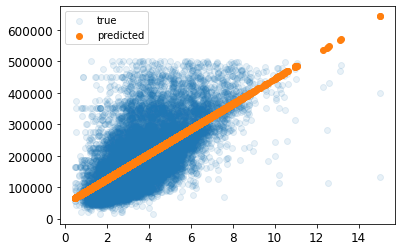

In [24]:
pred = ajuste_lineal.predict(x_train.reshape(-1,1))
plt.scatter(x_train.reshape(-1,1), y_train, label='true', alpha=0.1)
plt.scatter(x_train, pred, label='predicted')
plt.legend()

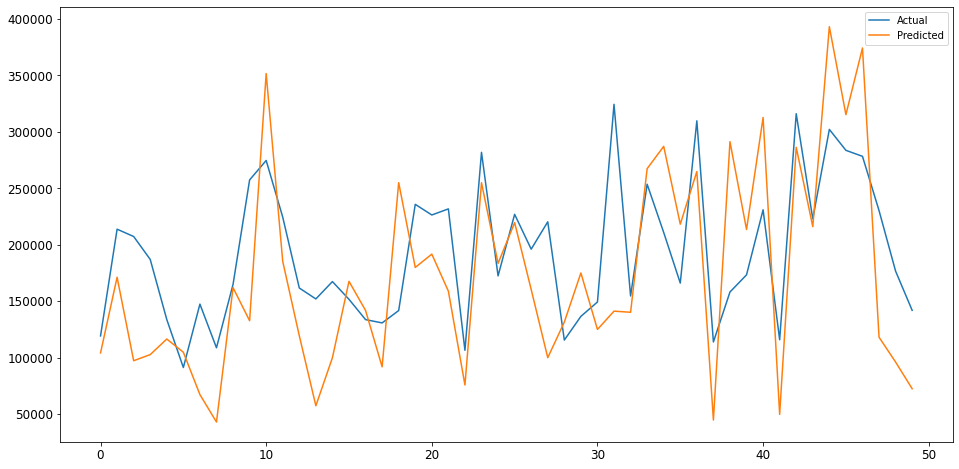

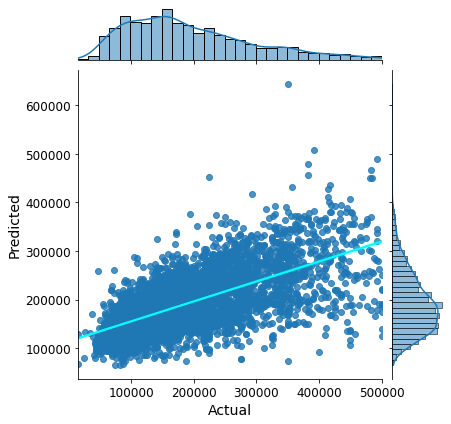

In [25]:
#Cómo funciona el predictor evaluando en el conjunto de testeo
y_pred = ajuste_lineal.predict(x_test.reshape(-1,1))

test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg', joint_kws={'line_kws':{'color':'cyan'}});

#### Usemos más variables independientes para hacer regresion lineal
Antes convertimos las variables categoricas de 'ocean_proximity' para poder usarlas en la regresion lineal

In [26]:
labelEncoder = LabelEncoder()
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()


0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [27]:
housing_ind = housing.drop("median_house_value",axis=1) #usamos todas las columnas salvo 'median_house_value'

housing_dep = housing["median_house_value"]


In [28]:
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)

#### Escalamos los datos. Esto es necesario porque al tener muchas variables independientes, evitamos el dominio de una sobre otras

In [29]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

Ahora sí, regresion lineal

In [30]:

linearRegModel = LinearRegression(n_jobs=-1)

linearRegModel.fit(X_train,y_train)

#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207194.69373788778
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


#### Una vez ajustado el modelo, predecimos sobre el conjunto de test

In [31]:
y_pred = linearRegModel.predict(X_test)

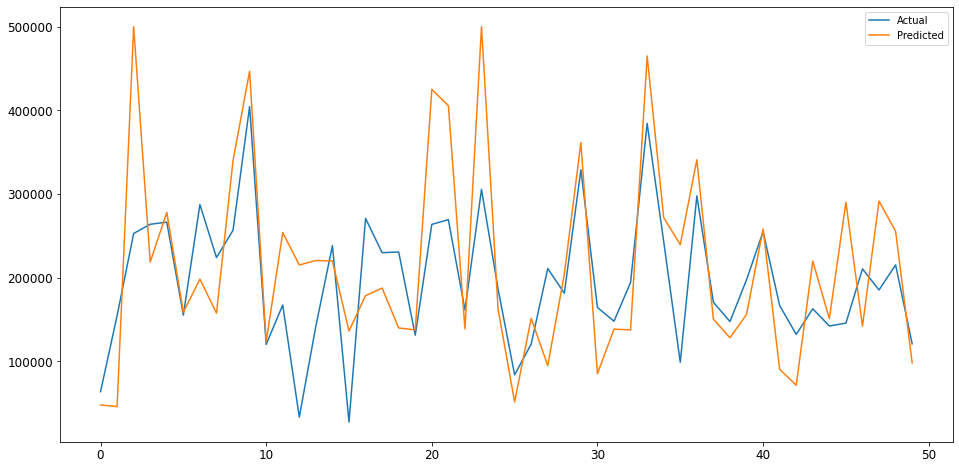

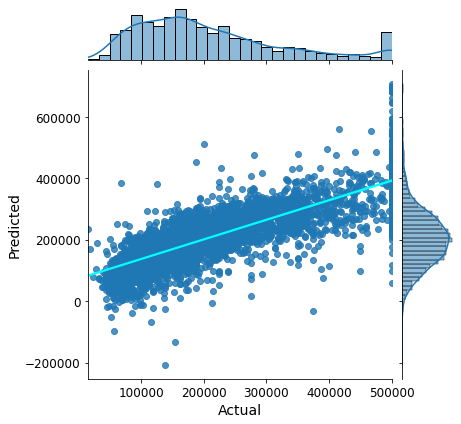

In [32]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',joint_kws={'line_kws':{'color':'cyan'}});

#### Miremos el RMSE del modelo

In [33]:
print(f'RMSE conjunto de test: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'RMSE conjunto de entrenamiento: {np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train)))}')

RMSE conjunto de test: 71147.87146118376
RMSE conjunto de entrenamiento: 69361.0714290645


### Random Forest y regresion

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#### Usaremos GridSearch para buscar los mejores valores de los hiperparámetros que elijamos

In [35]:
rnd_clf = RandomForestRegressor(n_jobs=-1)
parametros = {'n_estimators':[100,500,1000],'max_depth':[2,8,12]}
grilla = GridSearchCV(rnd_clf,parametros)
grilla.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [2, 8, 12],
                         'n_estimators': [100, 500, 1000]})

#### Los mejores hiperparámetros son:

In [36]:

print(grilla.best_params_)
mejor_modelo=grilla.best_estimator_
y_pred_rf = mejor_modelo.predict(X_test)


{'max_depth': 12, 'n_estimators': 500}


In [37]:
mejor_modelo

RandomForestRegressor(max_depth=12, n_estimators=500, n_jobs=-1)

In [38]:
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))}')

RMSE: 51481.681777034486


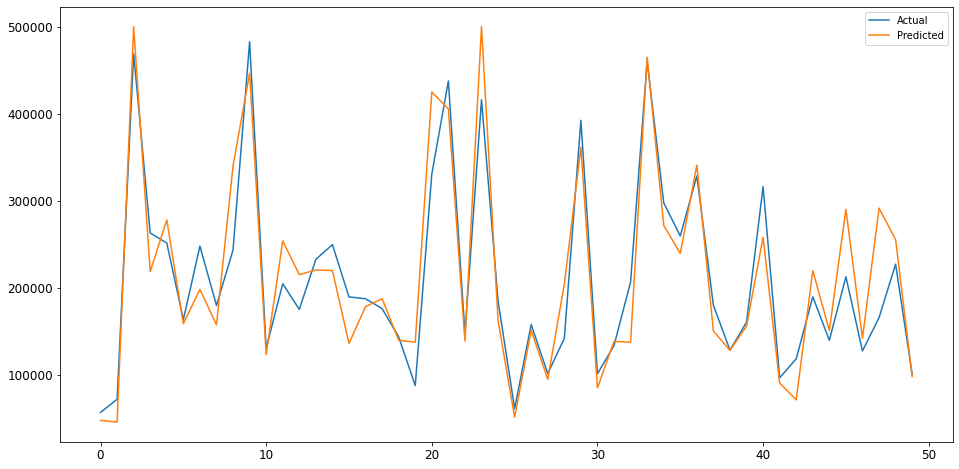

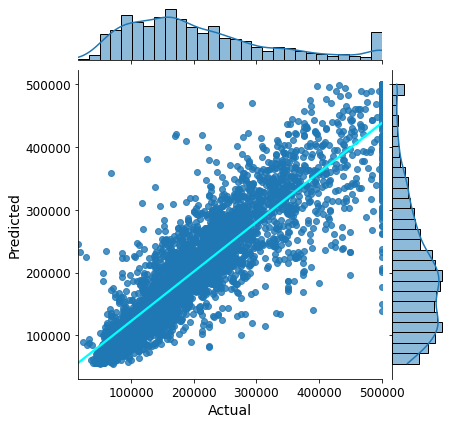

In [39]:
test = pd.DataFrame({'Predicted':y_pred_rf,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg",joint_kws={'line_kws':{'color':'cyan'}})